# Librerias

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install pennylane
!pip install qutip==4.7.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 17.8 MB/s eta 0:00:00


In [5]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-fonts-recommended
  texlive-latex-base texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

In [ ]:
from drive.MyDrive.Code_paper.dll.spin_procesor import Quantum_Spin_Proces
from qutip import basis
import numpy as np
import matplotlib.pyplot as plt
from qutip import Bloch
from matplotlib import cm
import matplotlib as mpl

from qutip import hadamard_transform


from drive.MyDrive.Code_paper.dll.main_fun import make_IRIS_v2
from drive.MyDrive.Code_paper.dll. baseline_dru import Modelo_DRU
from drive.MyDrive.Code_paper.dll.models import qcircuit_1_qubit_mixed
from drive.MyDrive.Code_paper.dll.cost_fub import fidelity_cost

from drive.MyDrive.Code_paper.dll.gate_procesor import CompositeGateProcessor

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [ ]:
from drive.MyDrive.Code_paper.dll.spin_procesor import Quantum_Spin_Proces
from qutip import basis
import numpy as np
import matplotlib.pyplot as plt
from qutip import Bloch
from matplotlib import cm
import matplotlib as mpl

from qutip import hadamard_transform


from drive.MyDrive.Code_paper.dll.main_fun import make_IRIS_v2
from drive.MyDrive.Code_paper.dll. baseline_dru import Modelo_DRU
from drive.MyDrive.Code_paper.dll.models import qcircuit_1_qubit_mixed
from drive.MyDrive.Code_paper.dll.cost_fub import fidelity_cost

from drive.MyDrive.Code_paper.dll.gate_procesor import CompositeGateProcessor

# Variables globales

In [ ]:
color_palette = [
    "#0f5492", "#cc6e0b", "#206821", "#a01d1d",
    "#704c92", "#63403a", "#9f5f91", "#666666",
    "#8c9520", "#118c9f", "#94b5d1", "#d18e56",
    "#75b871", "#d18f8d", "#a28bbf", "#a07d76"
]

# Funciones

In [ ]:
def plot_measure_continuous(ax, t, probability_i, i, arrow, tf_noise = False):
    if tf_noise == True:
        label_str = rf"$\left| \{arrow} \right\rangle_{{noisy}}$"
        if isinstance(arrow, list):
            arrow_str = ' '.join(arrow)  # Concatenar los elementos de la lista separados por un espacio
            label_str = rf"$\left| {arrow_str} \right\rangle_{{noisy}}$"
    else:
        label_str = rf"$\left| \{arrow} \right\rangle$"
        if isinstance(arrow, list):
            arrow_str = ' '.join(arrow)  # Concatenar los elementos de la lista separados por un espacio
            label_str = rf"$\left| {arrow_str} \right\rangle$"
    ax.plot(t*1e9, probability_i, c=color_palette[i],
            alpha=0.7, label = label_str)

In [ ]:
def plot_measure_scatter(ax, t, probability_i, i, arrow, N=1000, random_seed=None, tf_noise = False):
    #if random_seed is not None:
    #    np.random.seed(random_seed)

    if tf_noise == True:
        label_str = rf"$\left| \{arrow} \right\rangle_{{noisy}}$"
    else:
        label_str = rf"$\left| \{arrow} \right\rangle$"

    # Convertir probability_i a un array numpy si no lo es
    probability_i = np.array(probability_i)

    # Seleccionar N índices aleatorios de los datos
    random_indices = np.random.choice(len(t), size=N, replace=False).astype(int)
    selected_t = t[random_indices]
    selected_probability_i = probability_i[random_indices]

    # Crear lista de 16 tipos de marcadores distintos
    marker_types = ['o', 's', '^', 'v', 'D', 'P', '*', 'X', '>', '<', 'h', 'd', '|', '_', '+', '.']

    ax.scatter(selected_t*1e9, selected_probability_i, c=color_palette[i],
                alpha=0.7, label = label_str, s=10,
                  marker=marker_types[i])

In [ ]:
def calculate_T1(T2, T2start):
    T1 = (1/2)*((T2*T2start)/(T2start - T2))
    return T1

In [ ]:
def measure_compuse_states(procesor, list_states_overlap):

    n_states_time = len(procesor.states_in_time)
    Measure_0 = []
    Measure_1 = []
    for i in range(n_states_time):

        states_i = procesor.states_in_time[i]
        get_statest = [state.full() for state in states_i]

        state_0 = list_states_overlap[0]
        probability_0 = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
        Measure_0.extend(probability_0)

        state_1 = list_states_overlap[1]
        probability_1 = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]
        Measure_1.extend(probability_1)

    time = np.linspace(0, procesor.global_time, len(Measure_1))
    return time, Measure_0, Measure_1

#### 2 qubits

In [ ]:
def measure_compuse_states_2q(procesor, list_states_overlap):

    n_states_time = len(procesor.states_in_time)
    Measure_i = [[] for _ in range(len(list_states_overlap))]

    for i in range(n_states_time):
        for j,state_measure in enumerate(list_states_overlap):

            states_i = procesor.states_in_time[i]
            get_statest = [state.full() for state in states_i]
            _,nc = get_statest[0].shape
            if nc == 1:
                probability_i = [np.abs(state_measure @ state)[0][0]**2 for state in get_statest]
            else:
                probability_i = [np.abs((state_measure @ state @ state_measure.T)[0][0]) for state in get_statest]
            Measure_i[j].extend(probability_i)

        time = np.linspace(0, procesor.global_time, len(Measure_i[0]))
    return time, Measure_i

# Pruebas

## 1 Qubit - tiempo

### $R_x$

#### without noise

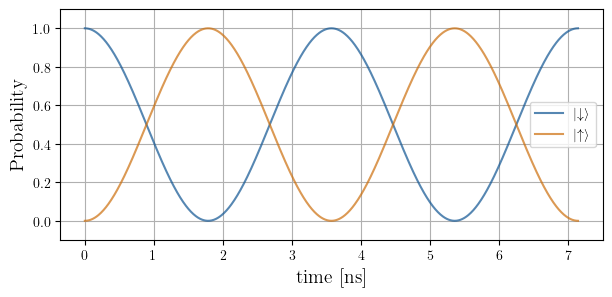

In [ ]:
# Estado inicial
ket_0 = basis(2, 0)

# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000)
alpha = 4*np.pi
out = procesor_1.Rx(alpha, ket_0, tf_expect=False)

# get tme and states:
t = procesor_1.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = np.array([[1, 0]])
probability_0 = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = np.array([[0, 1]])
probability_1 = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]

# plot measure:

fig, ax = plt.subplots(figsize=(7, 3))
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = True
plot_measure_continuous(ax, t, probability_0, 0, 'downarrow')
plot_measure_continuous(ax, t, probability_1, 1, 'uparrow')
ax.set_ylabel('Probability', fontsize=14)
ax.set_xlabel('time [ns]', fontsize=14)
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.grid()
#plt.savefig(f"Rxaa_.pdf", format='pdf', bbox_inches = 'tight')
plt.show()

#### with noise coherent

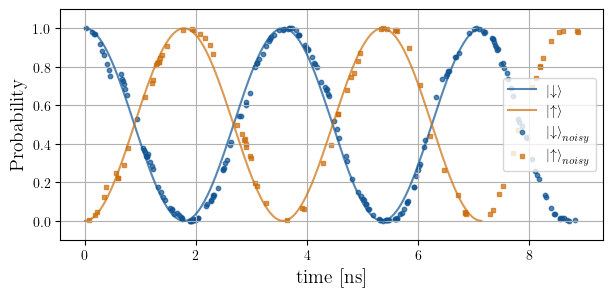

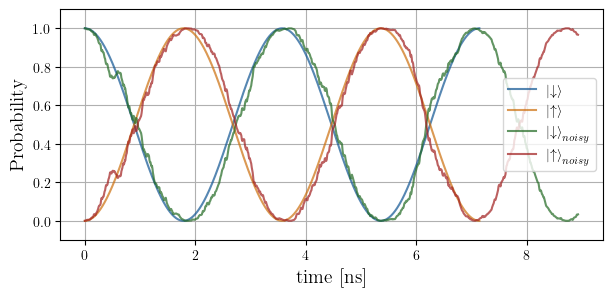

In [ ]:
# Estado inicial
ket_0 = basis(2, 0)

# Def procesador
procesor_2 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, tf_noise = True, noise_std = 0.028)
angle = 5*np.pi
out = procesor_2.Rx(angle, ket_0, tf_expect=False)

# get tme and states:
t_noisy = procesor_2.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = np.array([[1, 0]])
probability_0_noisy = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = np.array([[0, 1]])
probability_1_noisy = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]

# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0, 'downarrow')
plot_measure_continuous(ax, t, probability_1, 1, 'uparrow')
plot_measure_scatter(ax, t_noisy, probability_0_noisy,0,  'downarrow', N=200, random_seed=42, tf_noise = True)
plot_measure_scatter(ax, t_noisy, probability_1_noisy, 1, 'uparrow', N=80, random_seed=42, tf_noise = True)
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.grid()
plt.show()


fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0, 'downarrow')
plot_measure_continuous(ax, t, probability_1, 1, 'uparrow')
plot_measure_continuous(ax, t_noisy, probability_0_noisy, 2, 'downarrow', tf_noise = True)
plot_measure_continuous(ax, t_noisy, probability_1_noisy, 3, 'uparrow', tf_noise = True)
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.grid()
plt.show()

#### with quantum noisy

1.176529588766299e-08


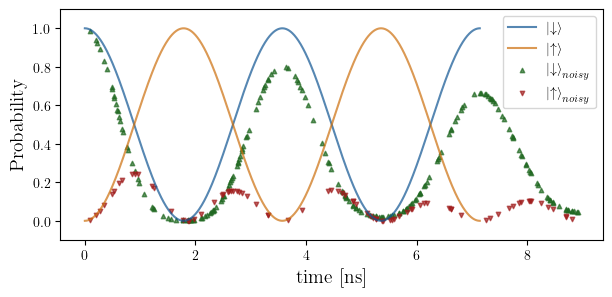

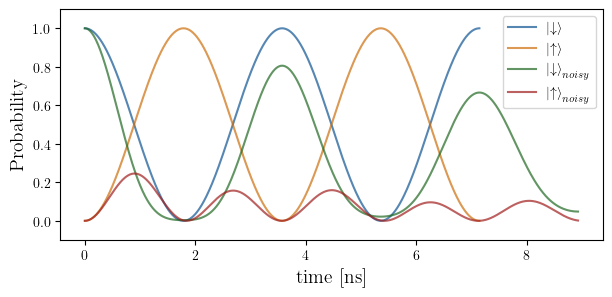

In [ ]:
# Estado inicial
ket_0 = basis(2, 0)

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)
print(T1c)
procesor_3 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, tf_noise = False, noise_std = 0.0159,
                                  tf_quantum_noise = True, T1= T1c, T2 = T2c)
angle = 5*np.pi
out = procesor_3.Rx(angle, ket_0, tf_expect=False)

# get tme and states:
t_noisy_q = procesor_3.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = np.array([[1, 0]])
probability_0_noisy_q = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = np.array([[0, 1]])
probability_1_noisy_q = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]

# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0, 'downarrow')
plot_measure_continuous(ax, t, probability_1, 1, 'uparrow')
plot_measure_scatter(ax, t_noisy, probability_0_noisy_q, 2,  'downarrow', N=200, random_seed=42, tf_noise = True)
plot_measure_scatter(ax, t_noisy, probability_1_noisy_q, 3, 'uparrow', N=80, random_seed=42, tf_noise = True)
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
#ax.grid()
plt.show()


fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0, 'downarrow')
plot_measure_continuous(ax, t, probability_1, 1, 'uparrow')
plot_measure_continuous(ax, t_noisy, probability_0_noisy_q, 2, 'downarrow', tf_noise = True)
plot_measure_continuous(ax, t_noisy, probability_1_noisy_q, 3, 'uparrow', tf_noise = True)
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
#ax.grid()
plt.show()

#### with both noises

1.176529588766299e-08


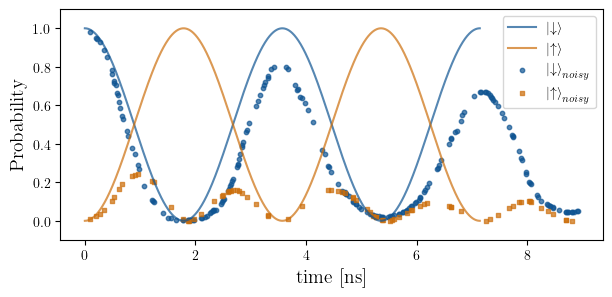

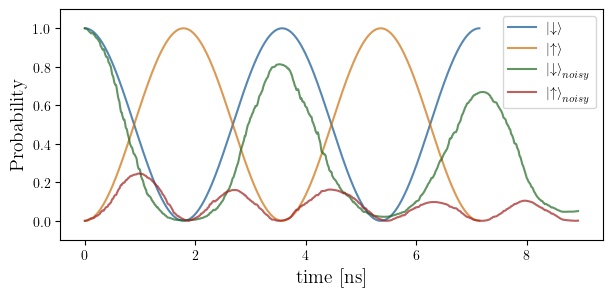

In [ ]:
# Estado inicial
ket_0 = basis(2, 0)

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)
print(T1c)

procesor_4 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, tf_noise = True, noise_std = 0.0159,
                                  tf_quantum_noise = True, T1= T1c, T2 = T2c)
angle = 5*np.pi
out = procesor_4.Rx(angle, ket_0, tf_expect=False)

# get tme and states:
t_noisy_cq = procesor_4.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = np.array([[1, 0]])
probability_0_noisy_cq = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = np.array([[0, 1]])
probability_1_noisy_cq = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]

# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0, 'downarrow')
plot_measure_continuous(ax, t, probability_1, 1, 'uparrow')
plot_measure_scatter(ax, t_noisy, probability_0_noisy_cq,0,  'downarrow', N=200, random_seed=42, tf_noise = True)
plot_measure_scatter(ax, t_noisy, probability_1_noisy_cq, 1, 'uparrow', N=80, random_seed=42, tf_noise = True)
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
#ax.grid()
plt.show()




fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0, 'downarrow')
plot_measure_continuous(ax, t, probability_1, 1, 'uparrow')
plot_measure_continuous(ax, t_noisy, probability_0_noisy_cq, 2, 'downarrow', tf_noise = True)
plot_measure_continuous(ax, t_noisy, probability_1_noisy_cq, 3, 'uparrow', tf_noise = True)
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
#ax.grid()
plt.show()

### $R_z$

<ipython-input-29-db0b6fa2052f>:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  ket_0 = hadamard_transform() * ket_00


1.176529588766299e-08
1.176529588766299e-08


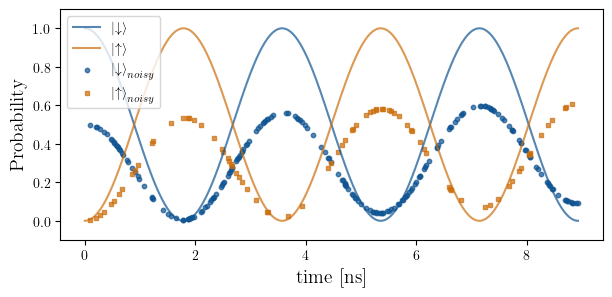

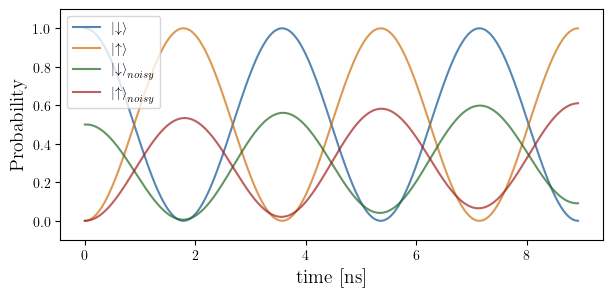

In [ ]:
# Estado inicial
ket_00 = basis(2, 0)
ket_0 = hadamard_transform() * ket_00

# =================
# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000)
angle = 5*np.pi
out = procesor_1.Rz(angle, ket_0, tf_expect=False)

# get tme and states:
t = procesor_1.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = (1/np.sqrt(2))*(np.array([[1, 0]]) + np.array([[0, 1]]))
probability_0 = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = (1/np.sqrt(2))*(np.array([[1, 0]]) - np.array([[0, 1]]))
probability_1 = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]


# =================
# Def procesador
procesor_2 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, tf_noise = True, noise_std = 0.0159)
angle = 5*np.pi
out = procesor_2.Rz(angle, ket_0, tf_expect=False)

# get tme and states:
t_noisy = procesor_2.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = (1/np.sqrt(2))*(np.array([[1, 0]]) + np.array([[0, 1]]))
probability_0_noisy = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = (1/np.sqrt(2))*(np.array([[1, 0]]) - np.array([[0, 1]]))
probability_1_noisy = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]

# =================
# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)
print(T1c)
procesor_3 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, tf_noise = False, noise_std = 0.0159,
                                  tf_quantum_noise = True, T1= T1c, T2 = T2c)
angle = 5*np.pi
out = procesor_3.Rz(angle, ket_0, tf_expect=False)

# get tme and states:
t_noisy_q = procesor_3.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = (1/np.sqrt(2))*(np.array([[1, 0]]) + np.array([[0, 1]]))
probability_0_noisy_q = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = (1/np.sqrt(2))*(np.array([[1, 0]]) - np.array([[0, 1]]))
probability_1_noisy_q = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]


# =================
# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)
print(T1c)

procesor_4 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, tf_noise = True, noise_std = 0.0159,
                                  tf_quantum_noise = True, T1= T1c, T2 = T2c)
angle = 5*np.pi
out = procesor_4.Rz(angle, ket_0, tf_expect=False)

# get tme and states:
t_noisy_cq = procesor_4.tlist
get_statest = [state.full() for state in out.states]

# Measure:
# P0
state_0 = (1/np.sqrt(2))*(np.array([[1, 0]]) + np.array([[0, 1]]))
probability_0_noisy_cq = [np.abs(state_0 @ state)[0][0]**2 for state in get_statest]
# P1
state_1 = (1/np.sqrt(2))*(np.array([[1, 0]]) - np.array([[0, 1]]))
probability_1_noisy_cq = [np.abs(state_1 @ state)[0][0]**2 for state in get_statest]


# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0, 'downarrow')
plot_measure_continuous(ax, t, probability_1, 1, 'uparrow')
plot_measure_scatter(ax, t_noisy, probability_0_noisy_cq,0,  'downarrow', N=200, random_seed=42, tf_noise = True)
plot_measure_scatter(ax, t_noisy, probability_1_noisy_cq, 1, 'uparrow', N=80, random_seed=42, tf_noise = True)
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
#ax.grid()
plt.show()




fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0, 'downarrow')
plot_measure_continuous(ax, t, probability_1, 1, 'uparrow')
plot_measure_continuous(ax, t_noisy, probability_0_noisy_cq, 2, 'downarrow', tf_noise = True)
plot_measure_continuous(ax, t_noisy, probability_1_noisy_cq, 3, 'uparrow', tf_noise = True)
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
#ax.grid()
plt.show()

### $R_y$

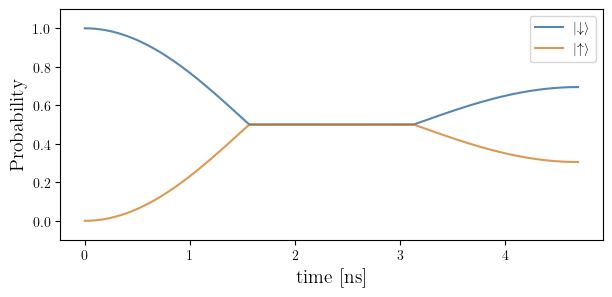

In [ ]:
# Estado inicial
ket_0 = basis(2, 0)

# =================
# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000)
angle = (3/2)*np.pi + 0.4
out = procesor_1.Ry(angle, ket_0, tf_expect=False)

list_states_overlap = [np.array([[1, 0]]), np.array([[0, 1]])]
t,probability_0, probability_1 = measure_compuse_states(procesor_1, list_states_overlap)


# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0, 'downarrow')
plot_measure_continuous(ax, t, probability_1, 1, 'uparrow')
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
#ax.grid()
plt.show()


#### Bloch sphere visualization

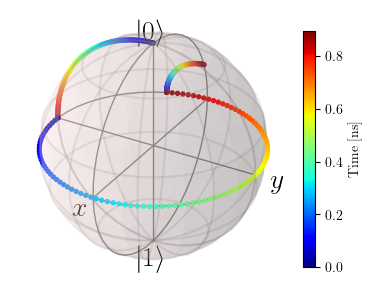

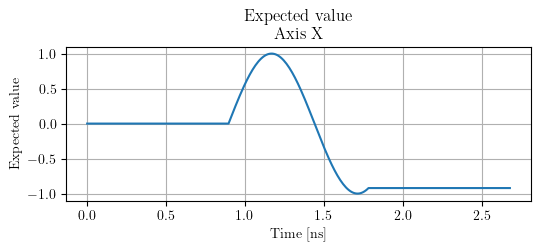

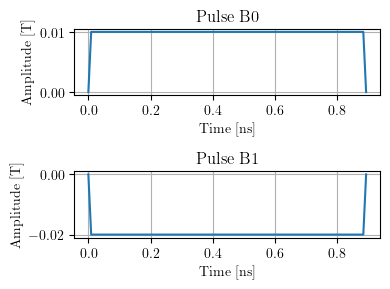

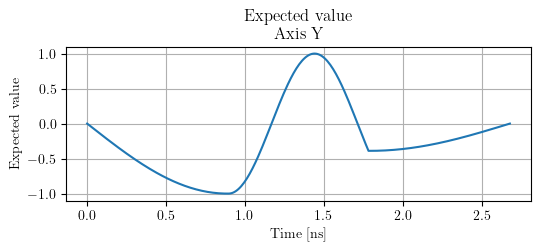

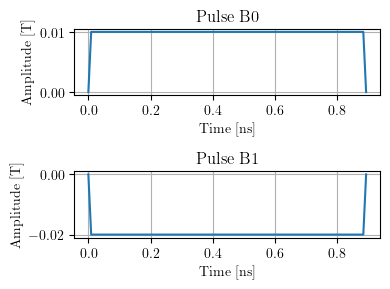

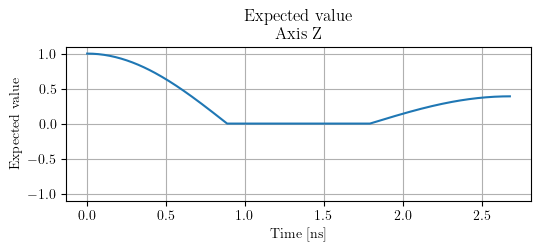

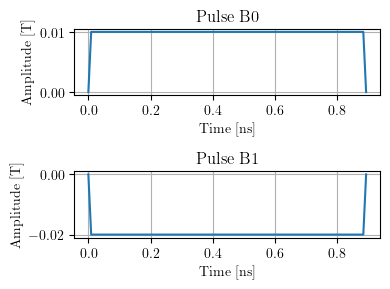

In [ ]:
model = Quantum_Spin_Proces(tf_noise = False, noise_std = 0.1)
ket_0 = basis(2, 0)
angle = (3/2)*np.pi + 0.4
out = model.Ry(angle , ket_0, tf_expect=True)
model.plot_expect(out, True)
model.plot_excharges(out, 0, True)
model.plot_excharges(out, 1, True)
model.plot_excharges(out, 2, True)



TypeError: plot_measure_continuous() missing 1 required positional argument: 'arrow'

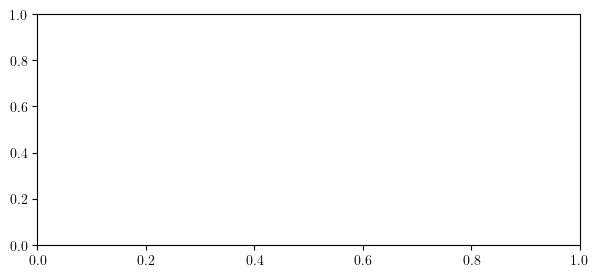

In [ ]:
# Estado inicial
ket_0 = basis(2, 0)

# =================
# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, tf_noise=True, noise_std=0.04)
angle = 4*np.pi -0.1
out = procesor_1.Ry(angle, ket_0, tf_expect=False)

list_states_overlap = [np.array([[1, 0]]), np.array([[0, 1]])]
t,probability_0, probability_1 = measure_compuse_states(procesor_1, list_states_overlap)


# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0)
plot_measure_continuous(ax, t, probability_1, 1)
plt.show()

#### with both noise

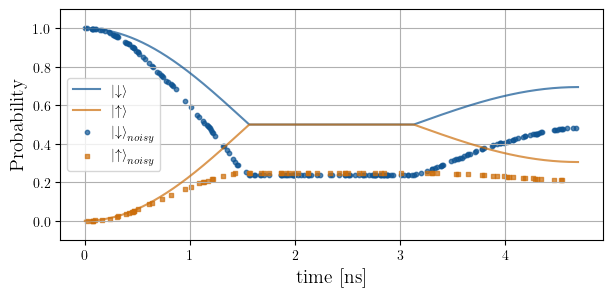

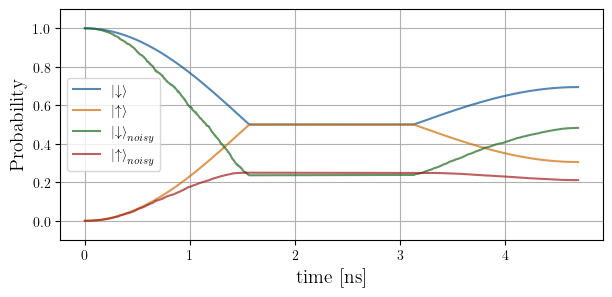

In [ ]:
# Estado inicial
ket_0 = basis(2, 0)
angle = (3/2)*np.pi + 0.4
# =================
# Def procesador

# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000)
angle = (3/2)*np.pi + 0.4
out = procesor_1.Ry(angle, ket_0, tf_expect=False)

list_states_overlap = [np.array([[1, 0]]), np.array([[0, 1]])]
t, probability_0, probability_1 = measure_compuse_states(procesor_1, list_states_overlap)


# Noise:
T2c = 2.3e-6
T2start = 102e-6
T1c = calculate_T1(T2c, T2start)

procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, tf_noise=True, noise_std=0.02, tf_quantum_noise=True, T1 = T1c, T2 = T2c)
out = procesor_1.Ry(angle, ket_0, tf_expect=False)

list_states_overlap = [np.array([[1, 0]]), np.array([[0, 1]])]
t,probability_0_noisy_cq, probability_1_noisy_cq = measure_compuse_states(procesor_1, list_states_overlap)


# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0, 'downarrow')
plot_measure_continuous(ax, t, probability_1, 1, 'uparrow')
plot_measure_scatter(ax, t, probability_0_noisy_cq,0,  'downarrow', N=200, random_seed=42, tf_noise = True)
plot_measure_scatter(ax, t, probability_1_noisy_cq, 1, 'uparrow', N=80, random_seed=42, tf_noise = True)
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.grid()
plt.show()


fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0, 'downarrow')
plot_measure_continuous(ax, t, probability_1, 1, 'uparrow')
plot_measure_continuous(ax, t, probability_0_noisy_cq, 2, 'downarrow', tf_noise = True)
plot_measure_continuous(ax, t, probability_1_noisy_cq, 3, 'uparrow', tf_noise = True)
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.grid()
plt.show()

### $L(i)$


#### Fit base line { $\omega^{*}$, $\theta^{*}$ }

In [ ]:
N_layeres = 2
n_classes = 3
n_features = 2
X, y =  make_IRIS_v2(n_features, n_classes)
model = Modelo_DRU(qcircuit_1_qubit_mixed, fidelity_cost,
                   epochs = 1, n_clases = n_classes, n_qubits = 1,
                   features = n_features, alpha_noise = 0.0, save_process=False,
                   num_layers = N_layeres)

paramters_1q, bias_1q = model.fit(X, y)

Epoch: 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


#### Spin processor

In [ ]:
# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=1000,
                                     N_qubits = 1,
                                    tf_noise = False, noise_std = 0.019,
                                    tf_quantum_noise = False, T1= T1c, T2 = T2c)
state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_1q,
                                             model.X_val[1],
                                             bias=bias_1q)


list_states_overlap = [np.array([[1, 0]]), np.array([[0, 1]])]
t,probability_0, probability_1 = measure_compuse_states(dru_circuit, list_states_overlap)



# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=1000,
                                     N_qubits = 1,
                                    tf_noise = True, noise_std = 0.019,
                                    tf_quantum_noise = True, T1= T1c, T2 = T2c)
state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_1q,
                                             model.X_val[1],
                                             bias=bias_1q)

list_states_overlap = [np.array([[1, 0]]), np.array([[0, 1]])]
t,probability_0_noisy_cq, probability_1_noisy_cq = measure_compuse_states(dru_circuit, list_states_overlap)

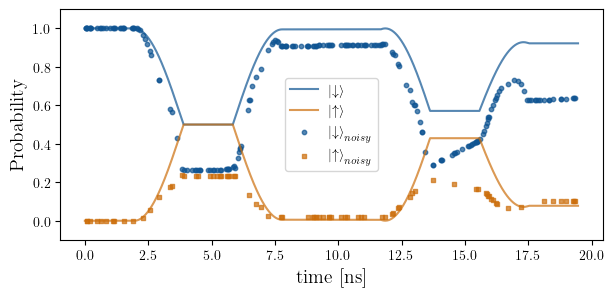

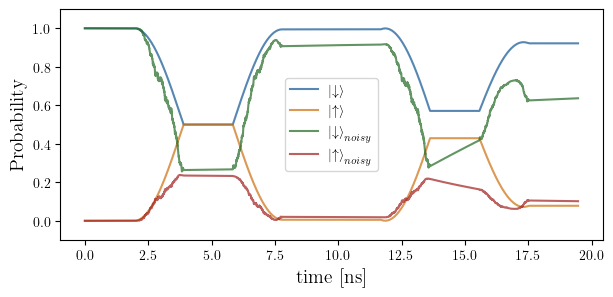

In [ ]:

# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0, 'downarrow')
plot_measure_continuous(ax, t, probability_1, 1, 'uparrow')
plot_measure_scatter(ax, t, probability_0_noisy_cq,0,  'downarrow', N=200, random_seed=42, tf_noise = True)
plot_measure_scatter(ax, t, probability_1_noisy_cq, 1, 'uparrow', N=80, random_seed=42, tf_noise = True)
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
#ax.grid()
plt.show()


fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plot_measure_continuous(ax, t, probability_0, 0, 'downarrow')
plot_measure_continuous(ax, t, probability_1, 1, 'uparrow')
plot_measure_continuous(ax, t, probability_0_noisy_cq, 2, 'downarrow', tf_noise = True)
plot_measure_continuous(ax, t, probability_1_noisy_cq, 3, 'uparrow', tf_noise = True)
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
#ax.grid()
plt.show()

## 1 Qubit - frecuencia

### $L(i)$

In [ ]:
f_range = np.linspace( -1760000000*0.7, 1760000000*0.7, 100)
ket_0 = basis(2, 1)
S = []

list_states_overlap = [np.array([[1, 0]]), np.array([[0, 1]])]

for fi in f_range:
    procesor_1 = CompositeGateProcessor(n_points_pulse_Ri = 10, f_rage = fi, ket_dru_0=ket_0)
    state_dru = procesor_1.qcircuit_DRU_1_Qubit(paramters_1q,
                                             model.X_val[1],
                                             bias=bias_1q)
    t,probability_0, probability_1 = measure_compuse_states(procesor_1, list_states_overlap)
    S.append(probability_0)


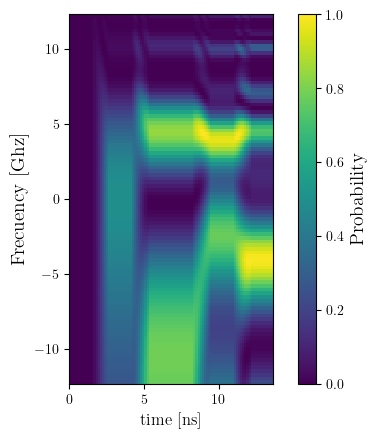

In [ ]:
# Crear la figura y el eje para la imagen
fig, ax = plt.subplots()
datos_np = np.array(S)
# Mostrar la imagen con intensidades normalizadas
imagen = ax.imshow(datos_np, cmap='viridis', interpolation='nearest',
                   extent=[t[0]*1e9, t[-1]*1e9, f_range[0]/1e8, f_range[-1]/1e8]
)
# Agregar barra de colores
colorbar = fig.colorbar(imagen)
# Agregar etiquetas de los ejes
ax.set_xlabel(r'time [ns]', fontsize=12)
ax.set_ylabel(r'Frecuency [Ghz]', fontsize=14)
imagen.set_clim(0, 1)
colorbar.set_label('Probability', fontsize=14)
# Mostrar la imagen
plt.show()

### $R_x$

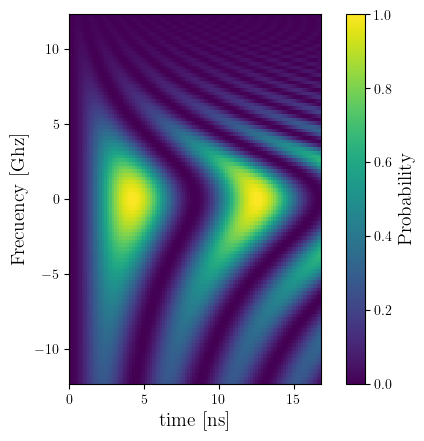

In [ ]:
f_range = np.linspace( -1760000000*0.7, 1760000000*0.7, 100)
ket_0 = basis(2, 1)
S = []
alpha = 4*np.pi
list_states_overlap = [np.array([[1, 0]]), np.array([[0, 1]])]

for fi in f_range:
    procesor_1 = CompositeGateProcessor(n_points_pulse_Ri = 100, f_rage = fi)
    state_dru = procesor_1.Rx(alpha,ket_0)
    t,probability_0, probability_1 = measure_compuse_states(procesor_1, list_states_overlap)
    S.append(probability_0)

# Crear la figura y el eje para la imagen
fig, ax = plt.subplots()
datos_np = np.array(S)
# Mostrar la imagen con intensidades normalizadas
imagen = ax.imshow(datos_np, cmap='viridis', interpolation='nearest',
                    extent=[t[0]*1e9, t[-1]*1e9, f_range[0]/1e8, f_range[-1]/1e8])
# Agregar barra de colores
colorbar = fig.colorbar(imagen)
ax.set_xlabel(r'time [ns]', fontsize=14)
ax.set_ylabel(r'Frecuency [Ghz]', fontsize=14)
imagen.set_clim(0, 1)
colorbar.set_label('Probability', fontsize=14)
plt.show()


## 2 Qubits - tiempo

#### SWAP

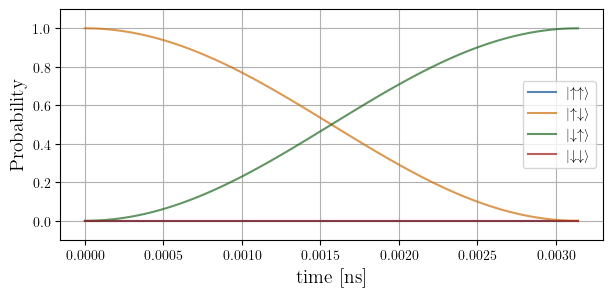

In [ ]:
# Estado inicial
from qutip import tensor
ket_0 = tensor(basis(2, 0),basis(2, 1))


# Def procesador
T2c = 22e-4
T2start = 1042e-4
T1c = calculate_T1(T2c, T2start)

# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, N_qubits=2,
                                J = 1e12, tf_noise = True,
                                noise_std = 0.0000019,
                                tf_quantum_noise = False,
                                T1= T1c, T2 = T2c)
angle = 5*np.pi
out = procesor_1.SWAP(ket_0, [], tf_expectt=False)



list_states_overlap = [np.array([[1, 0, 0, 0]]),
                       np.array([[0, 1, 0, 0]]),
                       np.array([[0, 0, 1, 0]]),
                        np.array([[0, 0, 0, 1]])]

time, m = measure_compuse_states_2q(procesor_1, list_states_overlap)


# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = True
plot_measure_continuous(ax, time, m[0], 0, [r"\uparrow", r"\uparrow"])
plot_measure_continuous(ax, time, m[1], 1, [r"\uparrow", r"\downarrow"])
plot_measure_continuous(ax, time, m[2], 2, [r"\downarrow", r"\uparrow"])
plot_measure_continuous(ax, time, m[3], 3, [r"\downarrow", r"\downarrow"])
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.grid()
plt.show()




#### $\sqrt{SWAP}$

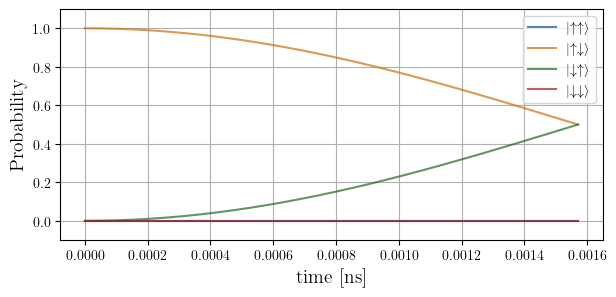

In [ ]:
# Estado inicial
from qutip import tensor
ket_0 = tensor(basis(2, 0),basis(2, 1))


# Def procesador
T2c = 22e-4
T2start = 1042e-4
T1c = calculate_T1(T2c, T2start)

# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, N_qubits=2,
                                J = 1e12, tf_noise = True,
                                noise_std = 0.0000019,
                                tf_quantum_noise = False,
                                T1= T1c, T2 = T2c)
angle = 5*np.pi
out = procesor_1.sqrt_SWAP(ket_0, [], tf_expectt=False)



list_states_overlap = [np.array([[1, 0, 0, 0]]),
                       np.array([[0, 1, 0, 0]]),
                       np.array([[0, 0, 1, 0]]),
                        np.array([[0, 0, 0, 1]])]

time, m = measure_compuse_states_2q(procesor_1, list_states_overlap)


# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = True
plot_measure_continuous(ax, time, m[0], 0, [r"\uparrow", r"\uparrow"])
plot_measure_continuous(ax, time, m[1], 1, [r"\uparrow", r"\downarrow"])
plot_measure_continuous(ax, time, m[2], 2, [r"\downarrow", r"\uparrow"])
plot_measure_continuous(ax, time, m[3], 3, [r"\downarrow", r"\downarrow"])
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.grid()
plt.show()

#### CZ

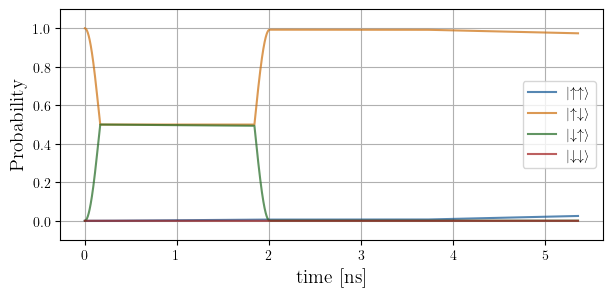

In [ ]:
# Estado inicial
from qutip import tensor
ket_0 = tensor(basis(2, 0),basis(2, 1))


# Def procesador
T2c = 22e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, N_qubits=2,
                                  J = 1e12, tf_noise = True, noise_std = 0.019,
                                    tf_quantum_noise = True, T1= T1c, T2 = T2c)

out = procesor_1.CZ(ket_0, [], tf_expectt=False)



list_states_overlap = [np.array([[1, 0, 0, 0]]),
                       np.array([[0, 1, 0, 0]]),
                       np.array([[0, 0, 1, 0]]),
                        np.array([[0, 0, 0, 1]])]

time, m = measure_compuse_states_2q(procesor_1, list_states_overlap)


# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = True
plot_measure_continuous(ax, time, m[0], 0, [r"\uparrow", r"\uparrow"])
plot_measure_continuous(ax, time, m[1], 1, [r"\uparrow", r"\downarrow"])
plot_measure_continuous(ax, time, m[2], 2, [r"\downarrow", r"\uparrow"])
plot_measure_continuous(ax, time, m[3], 3, [r"\downarrow", r"\downarrow"])
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.grid()
plt.show()

#### CNOT

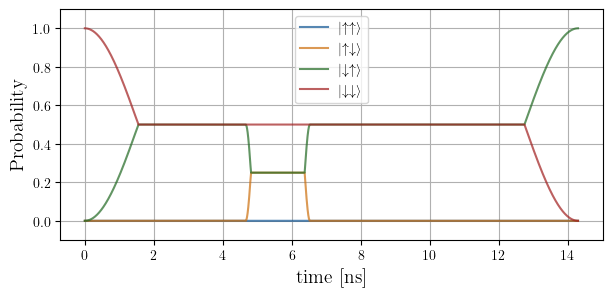

In [ ]:
# Estado inicial
from qutip import tensor
ket_0 = tensor(basis(2, 1),basis(2, 1))

# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, N_qubits=2, J = 1e12)
out = procesor_1.CNOT(ket_0, [], tf_expectt=False)



list_states_overlap = [np.array([[1, 0, 0, 0]]),
                       np.array([[0, 1, 0, 0]]),
                       np.array([[0, 0, 1, 0]]),
                        np.array([[0, 0, 0, 1]])]
time, m = measure_compuse_states_2q(procesor_1, list_states_overlap)


# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = True
plot_measure_continuous(ax, time, m[0], 0, [r"\uparrow", r"\uparrow"])
plot_measure_continuous(ax, time, m[1], 1, [r"\uparrow", r"\downarrow"])
plot_measure_continuous(ax, time, m[2], 2, [r"\downarrow", r"\uparrow"])
plot_measure_continuous(ax, time, m[3], 3, [r"\downarrow", r"\downarrow"])
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.grid()
plt.show()

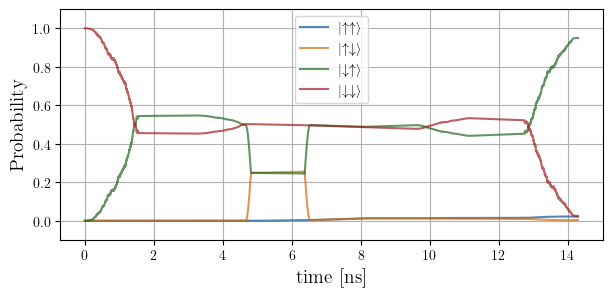

In [ ]:
# Estado inicial
from qutip import tensor
ket_0 = tensor(basis(2, 1),basis(2, 1))

# Def procesador
T2c = 22e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, N_qubits=2,
                                  J = 1e12, tf_noise = True, noise_std = 0.059,
                                    tf_quantum_noise = True, T1= T1c, T2 = T2c)
out = procesor_1.CNOT(ket_0, [], tf_expectt=False)



list_states_overlap = [np.array([[1, 0, 0, 0]]),
                       np.array([[0, 1, 0, 0]]),
                       np.array([[0, 0, 1, 0]]),
                       np.array([[0, 0, 0, 1]])]


time, m = measure_compuse_states_2q(procesor_1, list_states_overlap)


# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = True
plot_measure_continuous(ax, time, m[0], 0, [r"\uparrow", r"\uparrow"])
plot_measure_continuous(ax, time, m[1], 1, [r"\uparrow", r"\downarrow"])
plot_measure_continuous(ax, time, m[2], 2, [r"\downarrow", r"\uparrow"])
plot_measure_continuous(ax, time, m[3], 3, [r"\downarrow", r"\downarrow"])
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.grid()
plt.show()

In [ ]:
xlabels = ["a", "n", "x", "d"]

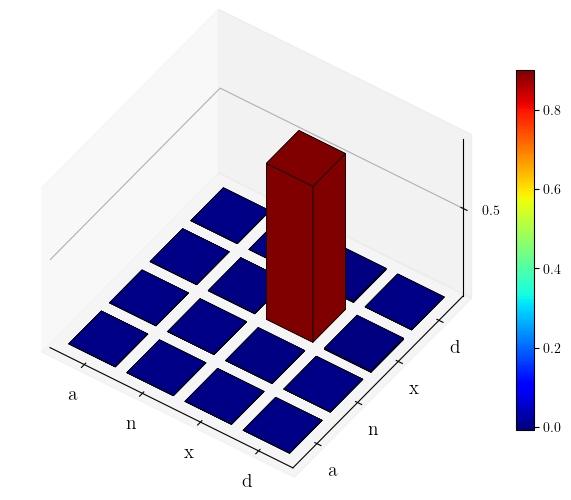

In [ ]:
from qutip import matrix_histogram
fig, ax = matrix_histogram(out * out.dag(), xlabels, xlabels)
ax.view_init(azim=-55, elev=45)
plt.show()

#### Bell states

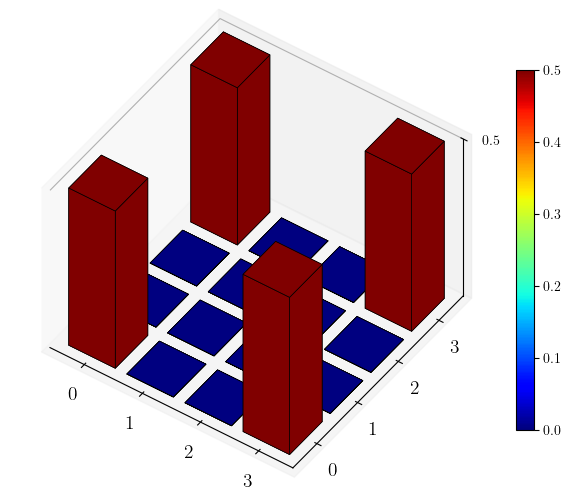

In [ ]:
from qutip import tensor, basis
from qutip import matrix_histogram

ket_0 = tensor(basis(2, 0),basis(2, 0))

# Def procesador
T2c = 22e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, N_qubits=2,
                                  J = 1e12, tf_noise = False, noise_std = 0.059,
                                    tf_quantum_noise = False, T1= T1c, T2 = T2c)

out = procesor_1.H(ket_0, q_obj=0).states[-1]
out = procesor_1.CNOT(out, [], tf_expectt=False)

fig, ax = matrix_histogram(out * out.dag())
ax.view_init(azim=-55, elev=45)
plt.show()

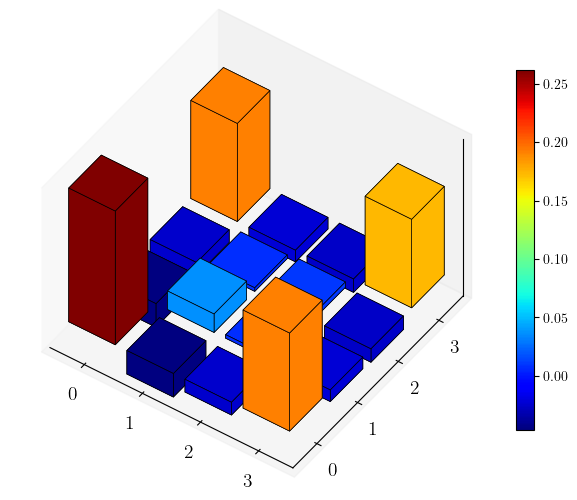

In [ ]:
from qutip import tensor, basis
from qutip import matrix_histogram

ket_0 = tensor(basis(2, 0),basis(2, 0))

# Def procesador
T2c = 22e-9
T2start = 102e-9
T1c = calculate_T1(T2c, T2start)

# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, N_qubits=2,
                                  J = 1e12, tf_noise = True, noise_std = 0.099,
                                    tf_quantum_noise = True, T1= T1c, T2 = T2c)

out = procesor_1.H(ket_0, q_obj=0).states[-1]
out = procesor_1.CNOT(out, [], tf_expectt=False)

fig, ax = matrix_histogram(out * out.dag())
ax.view_init(azim=-55, elev=45)
plt.show()

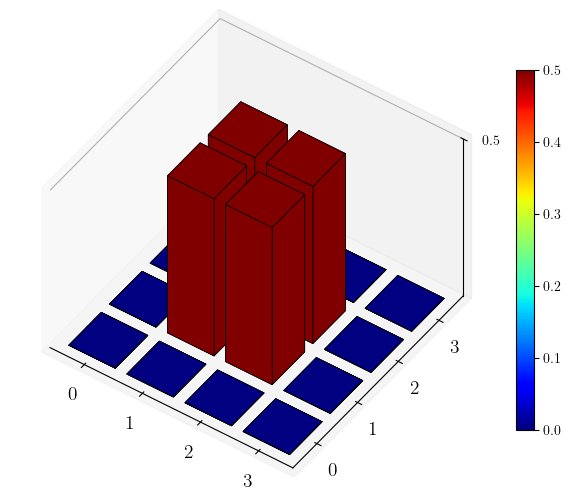

In [ ]:
from qutip import tensor, basis
from qutip import matrix_histogram

ket_0 = tensor(basis(2, 0),basis(2, 1))

# Def procesador
T2c = 22e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, N_qubits=2,
                                  J = 1e12, tf_noise = False, noise_std = 0.059,
                                    tf_quantum_noise = False, T1= T1c, T2 = T2c)

out = procesor_1.H(ket_0, q_obj=0).states[-1]
out = procesor_1.CNOT(out, [], tf_expectt=False)

fig, ax = matrix_histogram(out * out.dag())
ax.view_init(azim=-55, elev=45)
plt.show()

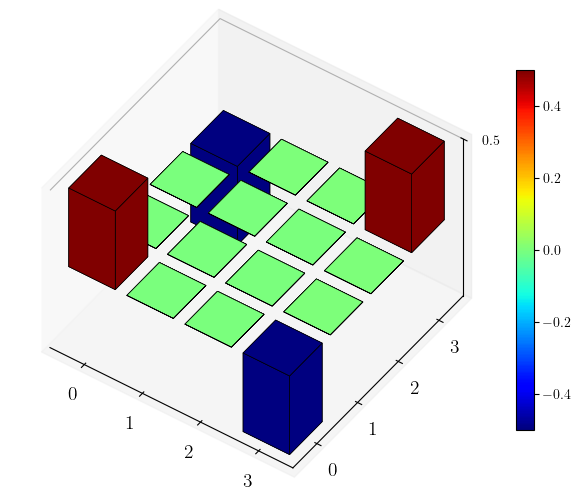

In [ ]:
from qutip import tensor, basis
from qutip import matrix_histogram

ket_0 = tensor(basis(2, 1),basis(2, 0))

# Def procesador
T2c = 22e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, N_qubits=2,
                                  J = 1e12, tf_noise = False, noise_std = 0.059,
                                    tf_quantum_noise = False, T1= T1c, T2 = T2c)

out = procesor_1.H(ket_0, q_obj=0).states[-1]
out = procesor_1.CNOT(out, [], tf_expectt=False)

fig, ax = matrix_histogram(out * out.dag())
ax.view_init(azim=-55, elev=45)
plt.show()

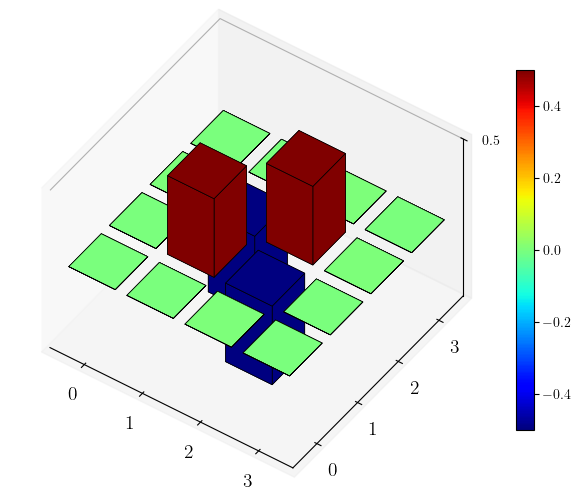

In [ ]:
from qutip import tensor, basis
from qutip import matrix_histogram

ket_0 = tensor(basis(2, 1),basis(2, 1))

# Def procesador
T2c = 22e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# Def procesador
procesor_1 = Quantum_Spin_Proces(n_points_pulse_Ri = 1000, N_qubits=2,
                                  J = 1e12, tf_noise = False, noise_std = 0.059,
                                    tf_quantum_noise = False, T1= T1c, T2 = T2c)

out = procesor_1.H(ket_0, q_obj=0).states[-1]
out = procesor_1.CNOT(out, [], tf_expectt=False)

fig, ax = matrix_histogram(out * out.dag())
ax.view_init(azim=-55, elev=45)
plt.show()

## 4 Qubits - tiempo

In [ ]:
def measure_compuse_states_2q(procesor, list_states_overlap):

    n_states_time = len(procesor.states_in_time)
    Measure_i = [[] for _ in range(len(list_states_overlap))]

    for i in range(n_states_time):
        for j,state_measure in enumerate(list_states_overlap):

            states_i = procesor.states_in_time[i]
            get_statest = [state.full() for state in states_i]
            _,nc = get_statest[0].shape
            if nc == 1:
                probability_i = [np.abs(state_measure @ state)[0][0]**2 for state in get_statest]
            else:
                probability_i = [np.abs((state_measure @ state @ state_measure.T)[0][0]) for state in get_statest]
            Measure_i[j].extend(probability_i)

        time = np.linspace(0, procesor.global_time, len(Measure_i[0]))
    return time, Measure_i

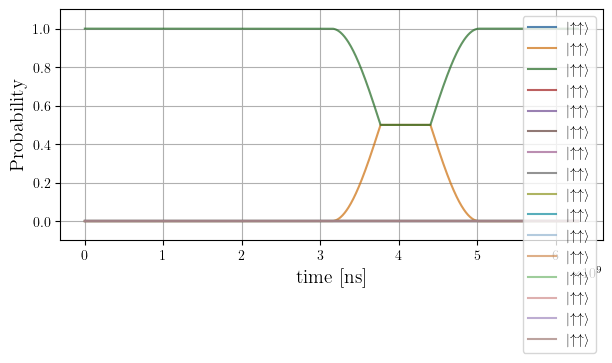

In [ ]:
#self.ket_dru_0 = self.CZ(self.ket_dru_0, [], q_obj = [0,1])
#self.ket_dru_0 = self.CZ(self.ket_dru_0, [], q_obj = [2,3])

from qutip import tensor
#self.ket_dru_0 = self.CZ(self.ket_dru_0, [], q_obj = [1,2], tf_expectt =False)
#self.ket_dru_0 = self.CZ_4(self.ket_dru_0, q_obj=[0,3], tf_expect=False)


# 4 binario
ket_0 = tensor(basis(2, 0),basis(2, 0), basis(2, 1), basis(2, 0))

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=100,
                                     N_qubits = 4,
                                    tf_noise = False, noise_std = 0.019,
                                    tf_quantum_noise = False, T1= T1c, T2 = T2c)

ket_dru_0 = dru_circuit.CZ(ket_0, [], q_obj = [0,1])
ket_dru_0 = dru_circuit.CZ(ket_dru_0, [], q_obj = [2,3])



states_4q = []
for i in range(16):
    estado_base = np.zeros((1,16))
    estado_base[0][i] = 1
    states_4q.append(estado_base)


time, m = measure_compuse_states_2q(dru_circuit, states_4q)





# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = True
for i in range(16):
    plot_measure_continuous(ax, time, m[i], i, [r"\uparrow", r"\uparrow"])
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.grid()
plt.show()




[0, 3]


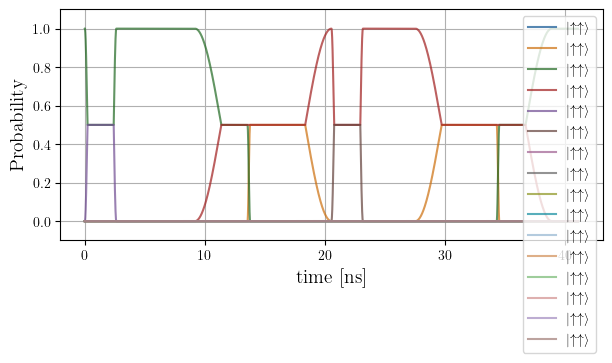

In [ ]:
from qutip import tensor



# 4 binario
ket_0 = tensor(basis(2, 0),basis(2, 0), basis(2, 1), basis(2, 0))

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=1000,
                                     N_qubits = 4,
                                     J = 1e12,
                                    tf_noise = False, noise_std = 0.019,
                                    tf_quantum_noise = False, T1= T1c, T2 = T2c)



ket_dru_0  = dru_circuit.CZ(ket_0, [], q_obj = [1,2], tf_expectt =False)
ket_dru_0 = dru_circuit.CZ_4(ket_dru_0 , q_obj=[0,3], tf_expect=False)

states_4q = []
for i in range(16):
    estado_base = np.zeros((1,16))
    estado_base[0][i] = 1
    states_4q.append(estado_base)


time, m = measure_compuse_states_2q(dru_circuit, states_4q)





# plot measure:
fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = True
for i in range(16):
    plot_measure_continuous(ax, time, m[i], i, [r"\uparrow", r"\uparrow"])
ax.set_ylabel(rf'Probability', fontsize=14)
ax.set_xlabel(r'time [ns]', fontsize=14)
#ax.set_title(rf'Probability of state $\left| {i} \right\rangle$', fontsize=16)
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.grid()
plt.show()


# II. Pruebas Fidelidad vs Ruido

# Pruebas definitivas

In [ ]:
from drive.MyDrive.Code_paper.dll.gate_procesor import CompositeGateProcessor
from collections import defaultdict
import pennylane as qml
import json
from drive.MyDrive.Code_paper.dll.main_fun import make_IRIS_v2
from drive.MyDrive.Code_paper.dll.models import qcircuit_1_qubit_mixed, qcircuit_2_qubit_mixed, qcircuit_4_qubit_mixed
from drive.MyDrive.Code_paper.dll.baseline_dru import Modelo_DRU
from drive.MyDrive.Code_paper.dll.cost_fub import fidelity_cost
from qutip import tensor

In [ ]:
# Función para calcular el promedio y la desviación estándar de una lista
def calcular_estadisticas(lista):
    promedio = np.mean(lista)
    desviacion_estandar = np.std(lista)
    return promedio, desviacion_estandar

def Fidelity_mean(model_base_line, X, y, epocas, n_classes, nqubits, n_features , N_layers, range_std, ket_0 = basis(2, 0), entgl = False,
                  coherent_noise = True, quantum_noise = False, n_lim = 5):
    # diccionario vacio defaul lista:
    Fidelities = defaultdict(list)
    # fit base line model:
    model = Modelo_DRU(model_base_line, fidelity_cost,
                   epochs = epocas, n_clases = n_classes, n_qubits = nqubits,
                   features = n_features, alpha_noise = 0.0, save_process=False,
                   num_layers = N_layers, entanglement=entgl)
    # get tuning parameters:
    paramters_iq, bias_iq = model.fit(X, y)
    # fidelity vs coherent noise in XTest
    for std in range_std:
        for x in model.X_val[n_lim]:
            dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=70,
                                                N_qubits = nqubits,
                                                tf_noise = coherent_noise, noise_std = std,
                                                tf_quantum_noise = quantum_noise, T1= T1c, T2 = T2c,
                                                ket_dru_0 = ket_0, J=1e12)
            if nqubits == 1:
                state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_iq,
                                                            x,
                                                            bias=bias_iq , entanglement=entgl)
                dm_baseline = qcircuit_1_qubit_mixed(paramters_iq, x, bias_iq, entanglement=entgl)
            elif nqubits == 2:
                state_dru = dru_circuit.qcircuit_DRU_2_Qubit(paramters_iq,
                                                            x,
                                                            bias=bias_iq , entanglement=entgl)
                dm_baseline = qcircuit_2_qubit_mixed(paramters_iq, x, bias_iq, entanglement=entgl)
            elif nqubits == 4:
                state_dru = dru_circuit.qcircuit_DRU_4_Qubit(paramters_iq,
                                                            x,
                                                            bias=bias_iq , entanglement=entgl)
                dm_baseline = qcircuit_4_qubit_mixed(paramters_iq, x, bias_iq, entanglement=entgl)

            # get dm of spins:
            dm_from_spins = state_dru*state_dru.dag().full()
            # fidelity:
            F  = qml.math.fidelity(dm_from_spins, dm_baseline)
            # save fidelity
            Fidelities[f"{nqubits}q_e_{entgl}_cn_{std}_qn_false"].append(F)
    # convert dict defaul list to json:
    diccionario_estandar = dict(Fidelities)
    # Exportar el diccionario como JSON
    with open("/content/drive/MyDrive/Code_paper/result_json/" + f"{nqubits}q_e_{entgl}_cn_{coherent_noise}_qn_{quantum_noise}_.json", 'w') as file:
        json.dump(diccionario_estandar, file)

    # Plot:
    # Find mean and std fidelity:
    promedios = []
    desviaciones_estandar = []
    # Calcular los promedios y desviaciones estándar para cada lista en el diccionario
    for lista in Fidelities.values():
        promedio, desviacion_estandar = calcular_estadisticas(lista)
        promedios.append(promedio)
        desviaciones_estandar.append(desviacion_estandar)
    # Crear el plot de los promedios
    plt.figure(figsize=(5,3))
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.plot(range(len(promedios)), promedios, label = "Average fidelity")
    plt.xlabel(r'$\sigma_{cn} [T]$',fontsize=16)
    plt.ylabel('Fidelity',fontsize=16)
    # Añadir mini box plots
    for i, lista in enumerate(Fidelities.values()):
        plt.boxplot(lista, positions=[i], widths=0.3, showmeans=True,
                    meanline=True, meanprops={'color': 'red'})
    plt.ylim(0,1.1)
    # change ticks
    # Redondear y formatear las etiquetas del eje x
    # Rotar las etiquetas del eje x a 45 grados
    array_redondeado = np.round(range_std, decimals=4)
    #plt.xticks(x, nuevas_etiquetas, rotation=45)
    plt.xticks(np.arange(len(array_redondeado)), array_redondeado, rotation = 45)
    plt.legend()
    plt.savefig("/content/drive/MyDrive/Code_paper/result_img/"+f"{nqubits}q_e_{entgl}_cn_{coherent_noise}_qn_{quantum_noise}_.pdf", format='pdf', bbox_inches = 'tight')
    plt.show()


In [ ]:
def Fidelity_mean_T2(model_base_line, X, y, epocas, n_classes, nqubits, n_features , N_layers, T2_range, T1_range,
                    ket_0 = basis(2, 0), entgl = False,
                  coherent_noise = True, quantum_noise = False, n_lim = 5):
    # diccionario vacio defaul lista:
    Fidelities = defaultdict(list)
    # fit base line model:
    model = Modelo_DRU(model_base_line, fidelity_cost,
                   epochs = epocas, n_clases = n_classes, n_qubits = nqubits,
                   features = n_features, alpha_noise = 0.0, save_process=False,
                   num_layers = N_layers, entanglement=entgl)
    # get tuning parameters:
    paramters_iq, bias_iq = model.fit(X, y)
    # fidelity vs coherent noise in XTest
    for i in range(len(T2_range)):
        for x in model.X_val[n_lim]:
            dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=200,
                                                N_qubits = nqubits,
                                                tf_noise = coherent_noise, noise_std = 0.0,
                                                tf_quantum_noise = quantum_noise, T1= T1_range[i], T2 = T2_range[i],
                                                ket_dru_0 = ket_0, J=1e12)
            if nqubits == 1:
                state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_iq,
                                                            x,
                                                            bias=bias_iq , entanglement=entgl)
                dm_baseline = qcircuit_1_qubit_mixed(paramters_iq, x, bias_iq, entanglement=entgl)
            elif nqubits == 2:
                state_dru = dru_circuit.qcircuit_DRU_2_Qubit(paramters_iq,
                                                            x,
                                                            bias=bias_iq , entanglement=entgl)
                dm_baseline = qcircuit_2_qubit_mixed(paramters_iq, x, bias_iq, entanglement=entgl)
            elif nqubits == 4:
                state_dru = dru_circuit.qcircuit_DRU_4_Qubit(paramters_iq,
                                                            x,
                                                            bias=bias_iq , entanglement=entgl)
                dm_baseline = qcircuit_4_qubit_mixed(paramters_iq, x, bias_iq, entanglement=entgl)

            # get dm of spins:
            dm_from_spins = state_dru*state_dru.dag().full()
            # fidelity:
            F  = qml.math.fidelity(dm_from_spins, dm_baseline)
            # save fidelity
            Fidelities[f"{nqubits}q_e_{entgl}_cn_{0}_qn_{round(T2_range[i],4)}"].append(F)
    # convert dict defaul list to json:
    diccionario_estandar = dict(Fidelities)
    # Exportar el diccionario como JSON
    # /content/drive/MyDrive/Code_paper/result_json
    with open("/content/drive/MyDrive/Code_paper/result_json/" + f"{nqubits}q_e_{entgl}_cn_{coherent_noise}_qn_{quantum_noise}_.json", 'w') as file:
        json.dump(diccionario_estandar, file)

    # Plot:
    # Find mean and std fidelity:
    promedios = []
    desviaciones_estandar = []
    # Calcular los promedios y desviaciones estándar para cada lista en el diccionario
    for lista in Fidelities.values():
        promedio, desviacion_estandar = calcular_estadisticas(lista)
        promedios.append(promedio)
        desviaciones_estandar.append(desviacion_estandar)
    # Crear el plot de los promedios
    plt.figure(figsize=(5,3))
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.plot(range(len(promedios)), promedios, label = "Average fidelity")
    plt.xlabel(r'$T_2$',fontsize=16)
    plt.ylabel('Fidelity',fontsize=16)
    # Añadir mini box plots
    for i, lista in enumerate(Fidelities.values()):
        plt.boxplot(lista, positions=[i], widths=0.3, showmeans=True,
                    meanline=True, meanprops={'color': 'red'})
    plt.ylim(0,1.1)
    # change ticks
    # Redondear y formatear las etiquetas del eje x
    # Rotar las etiquetas del eje x a 45 grados
    array_redondeado = np.round(T2_range*1e6, decimals=4)
    #plt.xticks(x, nuevas_etiquetas, rotation=45)
    plt.xticks(np.arange(len(array_redondeado)), array_redondeado, rotation = 45)
    plt.legend()
    # /content/drive/MyDrive/Code_paper/result_img
    plt.savefig("/content/drive/MyDrive/Code_paper/result_img/"+f"{nqubits}q_e_{entgl}_cn_{coherent_noise}_qn_{quantum_noise}_.pdf", format='pdf', bbox_inches = 'tight')
    plt.show()

In [ ]:
def Fidelity_mean_T2(model_base_line, X, y, epocas, n_classes, nqubits, n_features , N_layers, T2_range, T1_range,
                    ket_0 = basis(2, 0), entgl = False,
                  coherent_noise = True, quantum_noise = False, n_lim = 5):
    # diccionario vacio defaul lista:
  Fidelities = defaultdict(list)
  # fit base line model:
  model = Modelo_DRU(model_base_line, fidelity_cost,
                  epochs = epocas, n_clases = n_classes, n_qubits = nqubits,
                  features = n_features, alpha_noise = 0.0, save_process=False,
                  num_layers = N_layers, entanglement=entgl)
  # get tuning parameters:
  paramters_iq, bias_iq = model.fit(X, y)
  # fidelity vs coherent noise in XTest
  for i in range(len(T2_range)):
      for x in model.X_val[n_lim]:
          dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=200,
                                              N_qubits = nqubits,
                                              tf_noise = coherent_noise, noise_std = 0.0,
                                              tf_quantum_noise = quantum_noise, T1= T1_range[i], T2 = T2_range[i],
                                              ket_dru_0 = ket_0, J=1e12)
          if nqubits == 1:
              state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_iq,
                                                          x,
                                                          bias=bias_iq , entanglement=entgl)
              dm_baseline = qcircuit_1_qubit_mixed(paramters_iq, x, bias_iq, entanglement=entgl)
          elif nqubits == 2:
              state_dru = dru_circuit.qcircuit_DRU_2_Qubit(paramters_iq,
                                                          x,
                                                          bias=bias_iq , entanglement=entgl)
              dm_baseline = qcircuit_2_qubit_mixed(paramters_iq, x, bias_iq, entanglement=entgl)
          elif nqubits == 4:
              state_dru = dru_circuit.qcircuit_DRU_4_Qubit(paramters_iq,
                                                          x,
                                                          bias=bias_iq , entanglement=entgl)
              dm_baseline = qcircuit_4_qubit_mixed(paramters_iq, x, bias_iq, entanglement=entgl)

          # get dm of spins:
          dm_from_spins = state_dru*state_dru.dag().full()
          # fidelity:
          F  = qml.math.fidelity(dm_from_spins, dm_baseline)
          # save fidelity
          Fidelities[f"{nqubits}q_e_{entgl}_cn_{0}_qn_{round(T2_range[i]*1e6,4)}"].append(F)
  # convert dict defaul list to json:
  diccionario_estandar = dict(Fidelities)
  # Exportar el diccionario como JSON
  with open("/content/drive/MyDrive/Code_paper/result_json/" + f"{nqubits}q_e_{entgl}_cn_{coherent_noise}_qn_{quantum_noise}_.json", 'w') as file:
      json.dump(diccionario_estandar, file)

  # Plot:
  # Find mean and std fidelity:
  promedios = []
  desviaciones_estandar = []
  # Calcular los promedios y desviaciones estándar para cada lista en el diccionario
  for lista in Fidelities.values():
      promedio, desviacion_estandar = calcular_estadisticas(lista)
      promedios.append(promedio)
      desviaciones_estandar.append(desviacion_estandar)
  # Crear el plot de los promedios
  plt.figure(figsize=(5,3))
  plt.rcParams['text.usetex'] = True
  plt.rcParams['font.family'] = 'Times New Roman'
  plt.plot(range(len(promedios)), promedios, label = "Average fidelity")
  plt.xlabel(r'$T_2 [\mu s]$',fontsize=16)
  plt.ylabel('Fidelity',fontsize=16)
  # Añadir mini box plots
  for i, lista in enumerate(Fidelities.values()):
      plt.boxplot(lista, positions=[i], widths=0.3, showmeans=True,
                  meanline=True, meanprops={'color': 'red'})
  plt.ylim(0,1.1)
  # change ticks
  # Redondear y formatear las etiquetas del eje x
  # Rotar las etiquetas del eje x a 45 grados
  array_redondeado = np.round(T2_range*1e6, decimals=4)
  #plt.xticks(x, nuevas_etiquetas, rotation=45)
  plt.xticks(np.arange(len(array_redondeado)), array_redondeado, rotation = 45)
  plt.legend()
  plt.savefig("/content/drive/MyDrive/Code_paper/result_img/"+f"{nqubits}q_e_{entgl}_cn_{coherent_noise}_qn_{quantum_noise}_.pdf", format='pdf', bbox_inches = 'tight')
  plt.show()

Epoch: 100%|██████████| 10/10 [00:35<00:00,  3.60s/it]


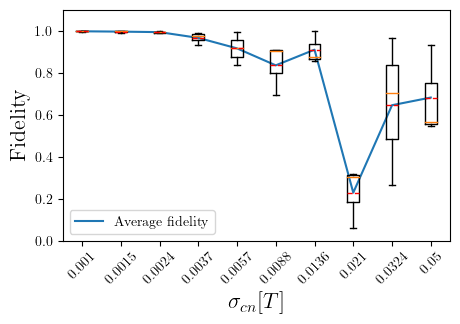

In [ ]:
"""
Fidelity_mean(model_base_line, X, y, epocas, n_classes, nqubits, n_features , N_layers, range_std, ket_0 = basis(2, 0), entgl = False,
                  coherent_noise = True, quantum_noise = False, n_lim = 5)
"""
N_layers = 5
n_classes = 3
n_features = 2
epocas = 10

nqubits = 1

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# data set
X, y =  make_IRIS_v2(n_features, n_classes)

start = np.log10(0.0010)  # Logaritmo base 10 de 0.001
stop = np.log10(0.05)     # Logaritmo base 10 de 0.05

# Genera 10 puntos uniformemente distribuidos en escala logarítmica
range_std = np.logspace(start, stop, num=10)

Fidelity_mean(qcircuit_1_qubit_mixed, X, y, epocas, n_classes,
               nqubits, n_features , N_layers, range_std,
                 ket_0 = basis(2, 0), entgl = False,
                  coherent_noise = True, quantum_noise = False, n_lim = 40)


Epoch: 100%|██████████| 10/10 [01:17<00:00,  7.71s/it]


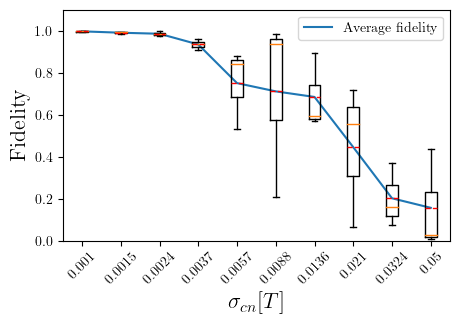

In [ ]:
N_layers = 5
n_classes = 3
n_features = 2
epocas = 10

nqubits = 2

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# data set
X, y =  make_IRIS_v2(n_features, n_classes)

start = np.log10(0.0010)  # Logaritmo base 10 de 0.001
stop = np.log10(0.05)     # Logaritmo base 10 de 0.05

# Genera 10 puntos uniformemente distribuidos en escala logarítmica
range_std = np.logspace(start, stop, num=10)

Fidelity_mean(qcircuit_2_qubit_mixed, X, y, epocas, n_classes,
               nqubits, n_features , N_layers, range_std,
                 ket_0 = tensor(basis(2, 0), basis(2, 0)), entgl = False,
                  coherent_noise = True, quantum_noise = False, n_lim = 40)

Epoch: 100%|██████████| 10/10 [01:18<00:00,  7.88s/it]


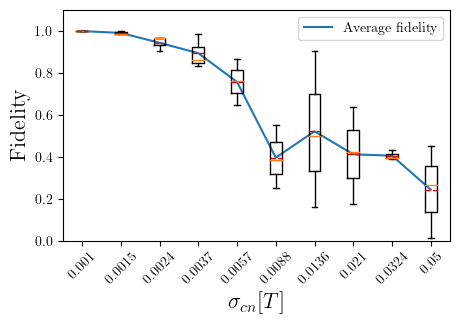

In [ ]:
N_layers = 5
n_classes = 3
n_features = 2
epocas = 10

nqubits = 2

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# data set
X, y =  make_IRIS_v2(n_features, n_classes)

start = np.log10(0.0010)  # Logaritmo base 10 de 0.001
stop = np.log10(0.05)     # Logaritmo base 10 de 0.05

# Genera 10 puntos uniformemente distribuidos en escala logarítmica
range_std = np.logspace(start, stop, num=10)

Fidelity_mean(qcircuit_2_qubit_mixed, X, y, epocas, n_classes,
               2, n_features , N_layers, range_std,
                 ket_0 = tensor(basis(2, 0), basis(2, 0)), entgl = True,
                  coherent_noise = True, quantum_noise = False, n_lim = 40)

Epoch: 100%|██████████| 10/10 [02:08<00:00, 12.82s/it]


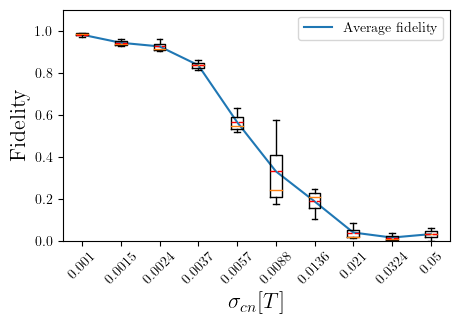

In [ ]:
N_layers = 5
n_classes = 3
n_features = 2
epocas = 10

nqubits = 2

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# data set
X, y =  make_IRIS_v2(n_features, n_classes)

start = np.log10(0.0010)  # Logaritmo base 10 de 0.001
stop = np.log10(0.05)     # Logaritmo base 10 de 0.05

# Genera 10 puntos uniformemente distribuidos en escala logarítmica
range_std = np.logspace(start, stop, num=10)

Fidelity_mean(qcircuit_4_qubit_mixed, X, y, epocas, n_classes,
               4, n_features , N_layers, range_std,
                 ket_0 = tensor(basis(2, 0), basis(2, 0), basis(2, 0), basis(2, 0)), entgl = True,
                  coherent_noise = True, quantum_noise = False, n_lim = 40)

Epoch: 100%|██████████| 10/10 [02:03<00:00, 12.35s/it]


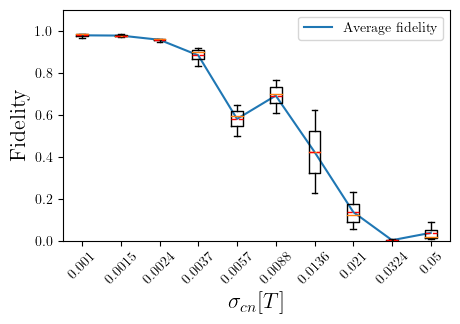

In [ ]:
N_layers = 5
n_classes = 3
n_features = 2
epocas = 10

nqubits = 2

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# data set
X, y =  make_IRIS_v2(n_features, n_classes)

start = np.log10(0.0010)  # Logaritmo base 10 de 0.001
stop = np.log10(0.05)     # Logaritmo base 10 de 0.05

# Genera 10 puntos uniformemente distribuidos en escala logarítmica
range_std = np.logspace(start, stop, num=10)

Fidelity_mean(qcircuit_4_qubit_mixed, X, y, epocas, n_classes,
               4, n_features , N_layers, range_std,
                 ket_0 = tensor(basis(2, 0), basis(2, 0), basis(2, 0), basis(2, 0)), entgl = False,
                  coherent_noise = True, quantum_noise = False, n_lim = 40)

# T2

Epoch: 100%|██████████| 10/10 [00:34<00:00,  3.46s/it]


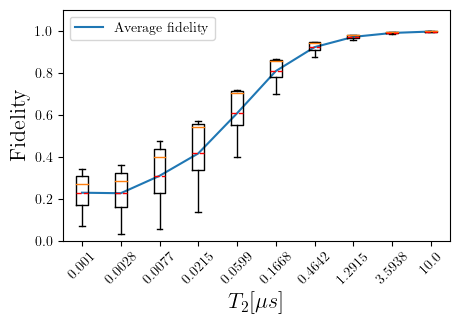

In [ ]:
N_layers = 5
n_classes = 3
n_features = 2
epocas = 10

nqubits = 1


# data set
X, y =  make_IRIS_v2(n_features, n_classes)

start = np.log10(0.001e-6)  # Logaritmo base 10 de 0.001
stop = np.log10(10e-6)     # Logaritmo base 10 de 0.05

# Genera 10 puntos uniformemente distribuidos en escala logarítmica
T2_range = np.logspace(start, stop, num=10)

T2start_range = T2_range*5
T1_range = (1/2)*((T2_range*T2start_range)/(T2start_range - T2_range))

Fidelity_mean_T2(qcircuit_1_qubit_mixed, X, y, epocas, n_classes, 1, n_features , N_layers, T2_range, T1_range,
                    ket_0 = basis(2, 0), entgl = False,
                  coherent_noise = False, quantum_noise = True, n_lim = 40)

Epoch: 100%|██████████| 10/10 [01:05<00:00,  6.54s/it]


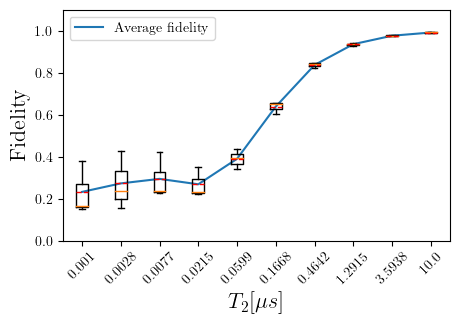

In [ ]:
N_layers = 5
n_classes = 3
n_features = 2
epocas = 10

nqubits = 2

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# data set
X, y =  make_IRIS_v2(n_features, n_classes)




start = np.log10(0.001e-6)  # Logaritmo base 10 de 0.001
stop = np.log10(10e-6)     # Logaritmo base 10 de 0.05

# Genera 10 puntos uniformemente distribuidos en escala logarítmica
T2_range = np.logspace(start, stop, num=10)

T2start_range = T2_range*5
T1_range = (1/2)*((T2_range*T2start_range)/(T2start_range - T2_range))

Fidelity_mean_T2(qcircuit_2_qubit_mixed, X, y, epocas, n_classes, 2, n_features , N_layers, T2_range, T1_range,
                     ket_0 = tensor(basis(2, 0),basis(2, 0)), entgl = False,
                  coherent_noise = False, quantum_noise = True, n_lim = 40)

Epoch: 100%|██████████| 10/10 [01:13<00:00,  7.37s/it]


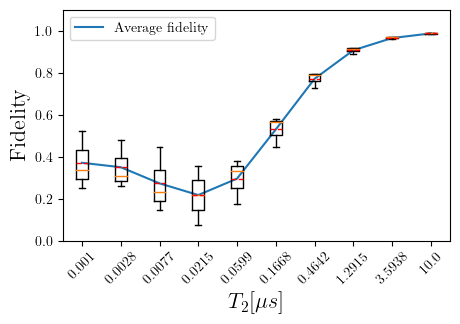

In [ ]:
N_layers = 5
n_classes = 3
n_features = 2
epocas = 10

nqubits = 2

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# data set
X, y =  make_IRIS_v2(n_features, n_classes)
start = np.log10(0.001e-6)  # Logaritmo base 10 de 0.001
stop = np.log10(10e-6)     # Logaritmo base 10 de 0.05

# Genera 10 puntos uniformemente distribuidos en escala logarítmica
T2_range = np.logspace(start, stop, num=10)
T2start_range = T2_range*5
T1_range = (1/2)*((T2_range*T2start_range)/(T2start_range - T2_range))

Fidelity_mean_T2(qcircuit_2_qubit_mixed, X, y, epocas, n_classes, 2, n_features , N_layers, T2_range, T1_range,
                    ket_0 = tensor(basis(2, 0),basis(2, 0)), entgl = True,
                  coherent_noise = False, quantum_noise = True, n_lim = 40)

Epoch: 100%|██████████| 10/10 [02:15<00:00, 13.54s/it]


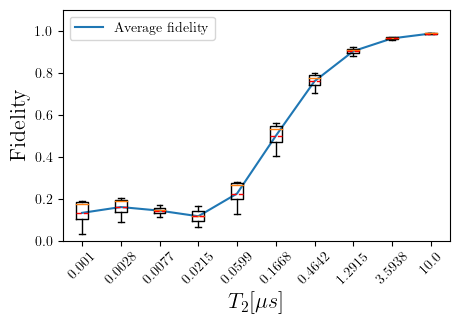

In [ ]:
N_layers = 5
n_classes = 3
n_features = 2
epocas = 10

nqubits = 4

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# data set
X, y =  make_IRIS_v2(n_features, n_classes)

start = np.log10(0.001e-6)  # Logaritmo base 10 de 0.001
stop = np.log10(10e-6)     # Logaritmo base 10 de 0.05

# Genera 10 puntos uniformemente distribuidos en escala logarítmica
T2_range = np.logspace(start, stop, num=10)

Fidelity_mean_T2(qcircuit_4_qubit_mixed, X, y, epocas, n_classes, 4, n_features , N_layers, T2_range, T1_range,
                    ket_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0)), entgl = False,
                  coherent_noise = False, quantum_noise = True, n_lim = 40)

Epoch: 100%|██████████| 10/10 [02:20<00:00, 14.01s/it]


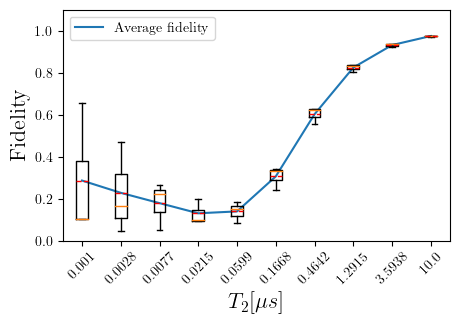

In [ ]:
N_layers = 5
n_classes = 3
n_features = 2
epocas = 10

nqubits = 4

# Def procesador
T2c = 2.3e-8
T2start = 102e-8
T1c = calculate_T1(T2c, T2start)

# data set
X, y =  make_IRIS_v2(n_features, n_classes)

start = np.log10(0.001e-6)  # Logaritmo base 10 de 0.001
stop = np.log10(10e-6)     # Logaritmo base 10 de 0.05

# Genera 10 puntos uniformemente distribuidos en escala logarítmica
T2_range = np.logspace(start, stop, num=10)
T2start_range = T2_range*5
T1_range = (1/2)*((T2_range*T2start_range)/(T2start_range - T2_range))

Fidelity_mean_T2(qcircuit_4_qubit_mixed, X, y, epocas, n_classes, 4, n_features , N_layers, T2_range, T1_range,
                    ket_0 = tensor(basis(2, 0),basis(2, 0),basis(2, 0),basis(2, 0)), entgl = True,
                  coherent_noise = False, quantum_noise = True, n_lim = 40)

# Prueba 2D - CN vs QN

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]c:\Users\UNALMAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\autograd\numpy\numpy_vjps.py:99: RuntimeWarning: divide by zero encountered in power
  defvjp(anp.sqrt,    lambda ans, x : lambda g: g * 0.5 * x**-0.5)
c:\Users\UNALMAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\autograd\numpy\numpy_wrapper.py:156: ComplexWarning: Casting complex values to real discards the imaginary part
  return A.astype(dtype, order, casting, subok, copy)
c:\Users\UNALMAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\autograd\numpy\numpy_vjps.py:99: RuntimeWarning: invalid value encountered in power
  defvjp(anp.sqrt,    lambda ans, x : lambda g: g * 0.5 * x**-0.5)
Epoch: 100%|██████████| 10/10 [00:31<00:00,  3.12s/it]


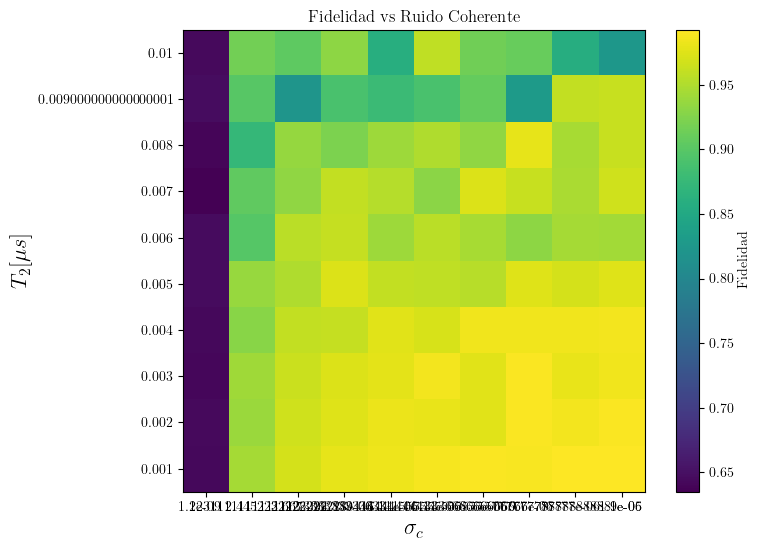

In [ ]:
range_std = np.linspace(0.0010, 0.01, 10)
T2_range= np.linspace(1e-9, 11e-6, 10)
ket_0 = basis(2, 0); entgl = False;
coherent_noise = True; quantum_noise = True; n_lim = 5;
# diccionario vacio defaul lista:
model_base_line = qcircuit_1_qubit_mixed
# fit base line model:
model = Modelo_DRU(model_base_line, fidelity_cost,
                epochs = epocas, n_clases = n_classes, n_qubits = nqubits,
                features = n_features, alpha_noise = 0.0, save_process=False,
                num_layers = N_layers, entanglement=entgl)
  # get tuning parameters:
paramters_iq, bias_iq = model.fit(X, y)
F_2d = np.zeros((len(range_std), len(T2_range)))
# fidelity vs coherent noise in XTest
for j in range(len(range_std)):
    for i in range(len(T2_range)):
        Fij = []
        for x in model.X_val[n_lim]:
            dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=200,
                                                N_qubits = nqubits,
                                                tf_noise = coherent_noise, noise_std = range_std[j],
                                                tf_quantum_noise = quantum_noise, T1= T1_range[i], T2 = T2_range[i],
                                                ket_dru_0 = ket_0, J=1e12)
            if nqubits == 1:
                state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_iq,
                                                            x,
                                                            bias=bias_iq , entanglement=entgl)
                dm_baseline = qcircuit_1_qubit_mixed(paramters_iq, x, bias_iq, entanglement=entgl)
            elif nqubits == 2:
                state_dru = dru_circuit.qcircuit_DRU_2_Qubit(paramters_iq,
                                                            x,
                                                            bias=bias_iq , entanglement=entgl)
                dm_baseline = qcircuit_2_qubit_mixed(paramters_iq, x, bias_iq, entanglement=entgl)
            elif nqubits == 4:
                state_dru = dru_circuit.qcircuit_DRU_4_Qubit(paramters_iq,
                                                            x,
                                                            bias=bias_iq , entanglement=entgl)
                dm_baseline = qcircuit_4_qubit_mixed(paramters_iq, x, bias_iq, entanglement=entgl)

            # get dm of spins:
            dm_from_spins = state_dru*state_dru.dag().full()
            # fidelity:
            F  = qml.math.fidelity(dm_from_spins, dm_baseline)
            # save fidelity
            Fij.append(F)
        F_2d[j,i] = np.mean(Fij)

# Definir los valores de X, Y y Z para la superficie
X, Y = np.meshgrid(T2_range, range_std)
Z = F_2d

# Crear la figura y los ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('T2 Range')
ax.set_ylabel('Range Std')
ax.set_zlabel('Fidelidad')

# Título
ax.set_title('Fidelidad vs Ruido Coherente')

# Barra de color
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Graficar F_2d
plt.figure(figsize=(8, 6))
plt.imshow(F_2d, cmap='viridis', interpolation='nearest', origin='lower')
plt.colorbar(label='Fidelidad')
plt.ylabel(r'$T_2 [\mu s]$',fontsize=16)
plt.xlabel(r'$\sigma_{c}$',fontsize=16)
plt.title('Fidelidad vs Ruido Coherente')
plt.xticks(range(len(T2_range)), T2_range)
plt.yticks(range(len(range_std)), range_std)
plt.show()


In [ ]:
arr_list = F_2d.tolist()
with open('array_data.json', 'w') as json_file:
    json.dump(arr_list, json_file)

# Prueba training

### Hacer los folds

In [59]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
# Cargar el conjunto de datos de iris
iris = load_iris()
X = iris.data
y = iris.target

# Crear el objeto KFold para generar las divisiones
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Iterar sobre las divisiones generadas por KFold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Aquí puedes entrenar y evaluar tu modelo en cada división
    # Por ejemplo:
    # model.fit(X_train, y_train)
    # score = model.score(X_test, y_test)

    # Imprimir información sobre la división actual
    print("Tamaño de entrenamiento:", len(X_train))
    print("Tamaño de prueba:", len(X_test))
    print("---------")

Tamaño de entrenamiento: 125
Tamaño de prueba: 25
---------
Tamaño de entrenamiento: 125
Tamaño de prueba: 25
---------
Tamaño de entrenamiento: 125
Tamaño de prueba: 25
---------
Tamaño de entrenamiento: 125
Tamaño de prueba: 25
---------
Tamaño de entrenamiento: 125
Tamaño de prueba: 25
---------
Tamaño de entrenamiento: 125
Tamaño de prueba: 25
---------


In [ ]:
from itertools import product
import random

In [ ]:
X, y =  make_IRIS_v2(3,3)
alpha_R = 0.5
model = Modelo_DRU(qcircuit_1_qubit_mixed, Trace_Distance_v3,
                        epochs = 2, n_clases = 3, n_qubits = 1,
                        features = 3, num_layers = 10, alpha_noise = 0.0, val_prc = 0.2,
                        save_process = False)
paramters_1q, bias_1q = model.fit(X, y)
X_test = model.X_val
y_test = model.y_val

In [ ]:
from itertools import product
import random

# Tus listas
f_cost_list = [Trace_Distance_v3, fidelity_cost, Von_Neumman_Divergence_v2, Renyi_Divergence_v2]
Noise_range = [0.0, 0.3, 0.5, 0.9]
N_layers = [3, 4, 5, 6, 10]
B0 = [1e-3, 10e-3, 1]
tf_noise = [True]
noise_std = [0.0, 1e-3, 1e-1]
T1s = [1e-3]
T2s = [23e-6, 6e-6]

# Generar todas las combinaciones posibles
all_combinations = list(product(f_cost_list, Noise_range, N_layers,
                                B0, tf_noise, noise_std, T1s,T2s))

# Barajar aleatoriamente las combinaciones
random.shuffle(all_combinations)

# Conjunto para realizar un seguimiento de las combinaciones utilizadas
used_combinations = set()

N = 100

# Realizar las pruebas
for i in range(N):

  combination = all_combinations[i]

  f_cost_i, q_noise,  n_layers, B0, tf_noise, noise_std, t1, t2 = combination

  if t1 == 0 or t2 == 0:
    tf_n = False
  else:
    tf_n = True

  if combination not in used_combinations:

    model = Modelo_DRU(qcircuit_1_qubit_mixed, f_cost_i,
                          epochs = 10, n_clases = 3, n_qubits = 1,
                          features = 3, num_layers = n_layers, alpha_noise = q_noise,
                          save_process = False)

    paramters_1q, bias_1q = model.fit(X, y)
    #X_test = model.X_val
    #y_test = model.y_val
    y_pred = []

    for x in X_test:
      dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=50,
                                        N_qubits = 1, tf_noise = tf_noise, noise_std = noise_std,
                                        tf_quantum_noise = tf_n,
                                        T1=t1, T2=t2)
      state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_1q, x, bias=bias_1q)
      dm_out = density_matrix_1(state_dru.full())
      clas_pred = _test_pulse_model(dm_out, model.state_labels)
      y_pred.append(clas_pred)

    report_dict = classification_report(y_test, y_pred, output_dict = True)
    write = report_to_excel(report_dict, "Save_excel_1q_iris_3_3.xlsx")
    write.dict_to_excel(1, tf_noise, noise_std, dru_circuit.B0, dru_circuit.B1,
                        n_layers, False,
                        f_cost_i, dru_circuit.T1, dru_circuit.T2, q_noise)

    # Agregar la combinación al conjunto de utilizadas
    used_combinations.add(combination)

### Def 1

In [16]:
from drive.MyDrive.Code_paper.dll.baseline_dru_v2 import Modelo_DRU as Modelo_DRU_v2
from drive.MyDrive.Code_paper.dll.cost_fub import Trace_Distance_v3
from drive.MyDrive.Code_paper.dll.main_fun import make_IRIS_v2, density_matrix_1, _test_pulse_model
from drive.MyDrive.Code_paper.dll.models import qcircuit_1_qubit_mixed
from drive.MyDrive.Code_paper.dll.gate_procesor import CompositeGateProcessor

from sklearn.model_selection import KFold

In [10]:
from sklearn.metrics import roc_auc_score
import numpy as np

In [35]:
import pennylane as qml

def fidelity(state0, state1):
  F  = qml.math.fidelity(state0, state1)
  return F

def _test_pulse_model_(state_output, state_labels):
  dm_labels = [density_matrix_1(s) for s in state_labels]
  fidelities = []
  for dm in dm_labels:
    #state_output = model(params, x[i], bias=bias, entanglement = entanglement, alpha_noise = alpha_noise)
    # fidelity_cost(model, params, x, y, state_labels=None)
    f = fidelity(state_output, dm)
    fidelities.append(f)
  best_fidel = np.argmax(fidelities)
  return best_fidel

In [53]:
from sklearn.preprocessing import OneHotEncoder

# Ejemplo de y_true e y_pred como vectores 1D de etiquetas de clases
y_true = np.array([0, 1, 2, 0, 1, 2])  # Ejemplo de etiquetas verdaderas
y_pred = np.array([0, 1, 2, 0, 2, 1])  # Ejemplo de predicciones

# Codificar las etiquetas en formato one-hot
encoder = OneHotEncoder(sparse=False)
y_true_one_hot = encoder.fit_transform(y_true.reshape(-1, 1))
y_pred_one_hot = encoder.transform(y_pred.reshape(-1, 1))

print("y_true one-hot:")
print(y_true_one_hot)
print("\ny_pred one-hot:")
print(y_pred_one_hot)


y_true one-hot:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

y_pred one-hot:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [61]:
roc_auc_score(y_true_one_hot, y_pred_one_hot)

ValueError: Found input variables with inconsistent numbers of samples: [6, 25]

In [60]:
X, y =  make_IRIS_v2(3,3)

alpha_R = 0.5


# Crear el objeto KFold para generar las divisiones
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Definicion de ruido

start = np.log10(0.001e-6)  # Logaritmo base 10 de 0.001
stop = np.log10(10e-6)     # Logaritmo base 10 de 0.05
# Genera 10 puntos uniformemente distribuidos en escala logarítmica
T2_range = np.logspace(start, stop, num=10)
T2start_range = T2_range*5
T1_range = (1/2)*((T2_range*T2start_range)/(T2start_range - T2_range))

  # ruido coherente
start = np.log10(0.0010)  # Logaritmo base 10 de 0.001
stop = np.log10(0.05)     # Logaritmo base 10 de 0.05
# Genera 10 puntos uniformemente distribuidos en escala logarítmica
range_std = np.logspace(start, stop, num=10)


# Iterar sobre las divisiones generadas por KFold
AUC = []
for train_index, test_index in kf.split(X):
  Auc_ij = np.zeros((len(range_std), len(T2_range)))
  for i in range(len(range_std)):
    for j in range(len(T2_range)):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      model = Modelo_DRU_v2(qcircuit_1_qubit_mixed, Trace_Distance_v3,
                        epochs = 2, n_clases = 3, n_qubits = 1,
                        features = 3, num_layers = 5, alpha_noise = 0.0, val_prc = 0.2,
                        save_process = False)
      paramters_1q, bias_1q = model.fit(X_train, y_train, X_test, y_test)
      # test in DRU in spins
      y_pred = []
      for x in X_test:
        dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=10,
                                           N_qubits = 1, tf_noise = True, noise_std = range_std[i],
                                           tf_quantum_noise = True,
                                           T1=T1_range[j], T2=T2_range[j])
        state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_1q, x, bias=bias_1q)
        dm_out = density_matrix_1(state_dru.full())
        clas_pred = _test_pulse_model_(dm_out, model.state_labels)
        y_pred.append(clas_pred)
      # calculos auc
      encoder = OneHotEncoder(sparse=False)
      y_test_one_hot = encoder.fit_transform(y_test.reshape(-1, 1))
      y_pred_one_hot = encoder.transform(np.array(y_pred).reshape(-1, 1))
      auc_score = roc_auc_score(y_test_one_hot, y_pred_one_hot,  multi_class='ovo')
      Auc_ij[i,j] = auc_score
  AUC.append(Auc_ij)

Epoch: 100%|██████████| 2/2 [00:12<00:00,  6.18s/it]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
Epoch: 100%|██████████| 2/2 [00:11<00:00,  5.68s/it]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
Epoch: 100%|██████████| 2/2 [00:09<00:00,  4.60s/it]
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
Epoch: 100%|██████████| 2/2 [00

KeyboardInterrupt: 

In [64]:
Auc_ij

array([[0.5       , 0.5       , 0.5       , 0.52832244, 0.61437908,
        0.64331427, 0.67333878, 0.67102397, 0.64270153, 0.64270153],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.64331427,
        0.64208878, 0.61437908, 0.61437908, 0.63977397, 0.63977397],
       [0.5       , 0.5       , 0.46936275, 0.55664488, 0.61608115,
        0.64208878, 0.64147603, 0.69873366, 0.63977397, 0.64025054],
       [0.5       , 0.5       , 0.49938725, 0.52770969, 0.76416122,
        0.66918573, 0.55187908, 0.67102397, 0.61083878, 0.70336329],
       [0.5       , 0.5       , 0.5       , 0.55603214, 0.52355664,
        0.57495915, 0.61145153, 0.52818627, 0.55126634, 0.51770153],
       [0.5       , 0.46936275, 0.43872549, 0.55895969, 0.60852397,
        0.48474946, 0.55017702, 0.54833878, 0.49230664, 0.51538671],
       [0.5       , 0.46875   , 0.46813725, 0.49353214, 0.46459695,
        0.42994281, 0.55249183, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       